In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [2]:
df= pd.read_csv("StudentsPerformance.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
df.rename(columns = {'parental level of education':'Parent education','test preparation course':'test prep course',
                    'race/ethnicity':'race_ethnicity'}, inplace=True)

In [6]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [7]:
df.columns

Index(['gender', 'race_ethnicity', 'Parent_education', 'lunch',
       'test_prep_course', 'math_score', 'reading_score', 'writing_score'],
      dtype='object')

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            1000 non-null   object
 1   race_ethnicity    1000 non-null   object
 2   Parent_education  1000 non-null   object
 3   lunch             1000 non-null   object
 4   test_prep_course  1000 non-null   object
 5   math_score        1000 non-null   int64 
 6   reading_score     1000 non-null   int64 
 7   writing_score     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
# Gender

In [11]:
df.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

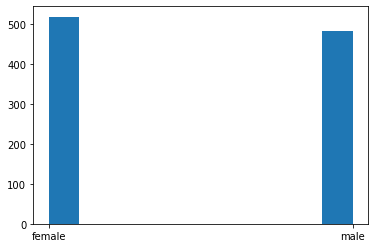

In [12]:
plt.hist(df.gender)
plt.show()

In [13]:
# race_ethnicity

In [14]:
df.race_ethnicity.value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

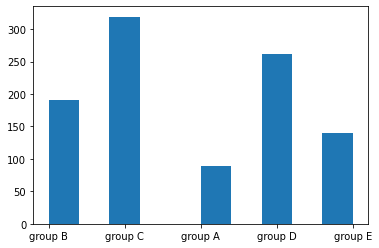

In [15]:
plt.hist(df.race_ethnicity)
plt.show()

In [16]:
# Parental education

In [17]:
df.Parent_education.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Parent_education, dtype: int64

In [18]:
# Lucnh

In [19]:
df.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [20]:
# Test prep score

In [21]:
df.test_prep_course.value_counts()

none         642
completed    358
Name: test_prep_course, dtype: int64

In [22]:
# Scores

In [23]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [24]:
def outlier(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    print (lower_range,upper_range)
    plt.hist(datacolumn)
    plt.show()

27.0 107.0


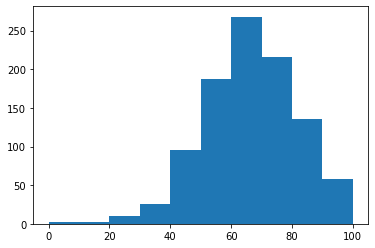

In [25]:
outlier(df.math_score)

In [26]:
df[(df.math_score < 27) ]

,gender,race_ethnicity,Parent_education,lunch,test_prep_course,math_score,reading_score,writing_score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


29.0 109.0


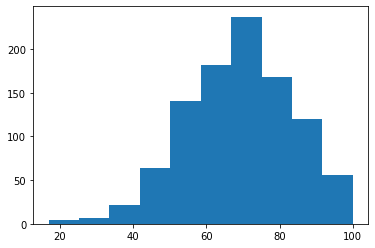

In [27]:
outlier(df.reading_score)

In [28]:
df[(df.reading_score < 29)]

,gender,race_ethnicity,Parent_education,lunch,test_prep_course,math_score,reading_score,writing_score
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23


25.875 110.875


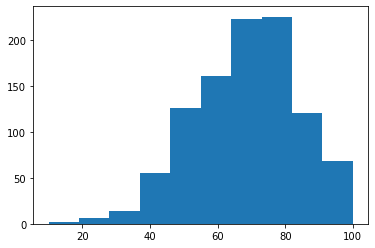

In [29]:
outlier(df.writing_score)

In [30]:
df[df.writing_score <26]

,gender,race_ethnicity,Parent_education,lunch,test_prep_course,math_score,reading_score,writing_score
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23


In [31]:
# You may choose to remove the outliers I have found out above. Personally, for a data set like this where column is in the range of 0-100, I am not a big fan of removing points: especially the univariate outliers

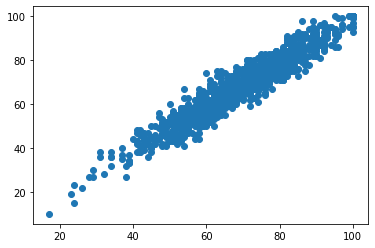

In [32]:
plt.scatter(df.reading_score,df.writing_score)

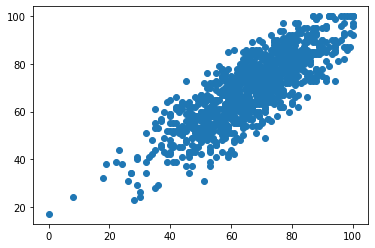

In [33]:
plt.scatter(df.math_score,df.reading_score)

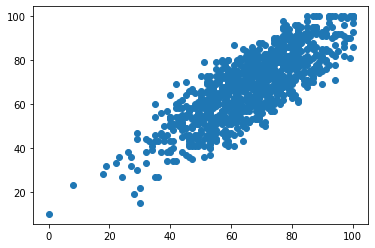

In [34]:
plt.scatter(df.math_score,df.writing_score)

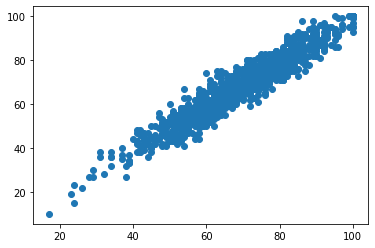

In [35]:
plt.scatter(df.reading_score,df.writing_score)

In [36]:
# There are only a few points that seem to be away form the cluster.
# Students who have got marks below 20 are really few and are outliers.
# You may remove them to improve the dataset.
# I've tested the quality of the data set. 

In [37]:
df=df[df.math_score>20]

In [38]:
df=df[df.reading_score>20]

In [39]:
df=df[df.writing_score>20]

In [40]:
df

,gender,race_ethnicity,Parent_education,lunch,test_prep_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [41]:
df.to_csv("StudentPerf Clean.csv")